<a href="https://colab.research.google.com/github/rajivsresearch/Data-Science/blob/master/Model_Corona.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I found this [article](https://towardsdatascience.com/covid-19-infection-in-italy-mathematical-models-and-predictions-7784b4d7dd8d) that uses a mathematical model to predict the spread of Corona Virus in Italy. I have adapted this for my own purposes. Thanks to the Author.

This notebook will attemp to use the model provided by the author to other countries to predict the spread of Covid-19. 

In [160]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
%matplotlib inline

ImportError: ignored

In [0]:
#url = "https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv"
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'

df = pd.read_csv(url)

In [58]:
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,14,14,14,19,19,19,19,25,25,25,25,32,32,32,33,33,33,33,33,34,35,35,35,35,35,35,35,35,37,40,40,41,42,42,43,43,43,47,48,50,50,50,53,59,70,75,82,114,147,177,212,272
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,7,7,11,15,20,20,20,22,22,45,25,25,26,26,26,28,28,29,43,59,66,74,84,94,105,122,147,159,170,189,214,228,241,256,274,293,331,360,420,461,502,511,581,639,639,701,773,839,825,878,889,924
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,7,7,10,13,16,18,18,24,28,28,30,33,40,45,47,50,58,67,72,75,77,81,84,84,85,85,89,89,91,93,93,93,102,106,108,110,110,117,130,138,150,150,160,178,178,200,212,226,243,266,313,345
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,4,7,8,8,8,8,8,10,12,12,12,16,16,18,18,18,19,19,22,22,22,22,22,22,22,22,22,22,22,22,23,23,25,29,29,36,50,50,83,93,99,117,129,149,149,197,238,428,566,673,790,900


In [0]:
country = 'France'

In [0]:
df1 = df.loc[df['Country/Region'] == country, :].drop(['Country/Region', 'Province/State', 'Lat', 'Long'], axis=1).sum().reset_index()

In [0]:
df1.columns = ['date', 'cases']

In [142]:
print('Number of days with cases: ', df1.loc[df1['cases']>0,'cases'].count())
print('Number of total days: ', df1.loc[:,'cases'].count())

Number of days with cases:  56
Number of total days:  58


In [0]:
df1['date'] = pd.to_datetime(df1.loc[:,'date'])

In [144]:
df1.head()

,date,cases
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,2
3,2020-01-25,3
4,2020-01-26,3


a refers to the infection speed
b is the day with the maximum infections occurred
c is the total number of recorded infected people at the infection’s end

In [0]:
def logistic_model(x,a,b,c):
    return c/(1+np.exp(-(x-b)/a))

In [0]:
x = list(df1.iloc[:,0].dt.dayofyear)
y = list(df1.iloc[:,1])

In [0]:
fit = curve_fit(logistic_model,x,y,p0=[2,100,2000])

In [0]:
a = fit[0][0]
b = fit[0][1]
c = fit[0][2]

In [0]:
sol = int(fsolve(lambda x : logistic_model(x,a,b,c) - int(c),b))

In [0]:
lastday = (datetime(2020, 1, 1) + timedelta(sol - 1)).strftime("%m-%d-%Y")

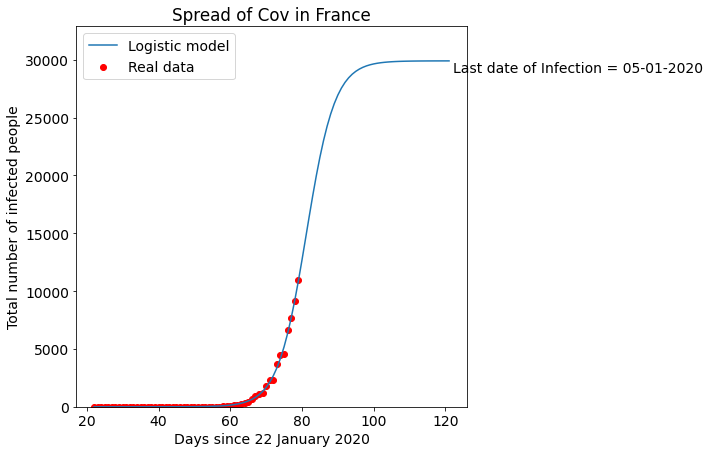

In [176]:
pred_x = list(range(max(x),sol))
plt.rcParams['figure.figsize'] = [7, 7]
plt.rc('font', size=14)
# Real data
plt.scatter(x,y,label="Real data",color="red")
# Predicted logistic curve
plt.plot(x+pred_x, [logistic_model(i,fit[0][0],fit[0][1],fit[0][2]) for i in x+pred_x], label="Logistic model" )
plt.legend()
plt.title('Spread of Cov in ' + country)
plt.xlabel("Days since 22 January 2020")
plt.ylabel("Total number of infected people")
plt.annotate('Last date of Infection = ' + lastday, (sol,logistic_model(sol,fit[0][0],fit[0][1],fit[0][2])-1000))
plt.ylim((min(y)*0.9,c*1.1))
plt.show()